<a href="https://colab.research.google.com/github/Lesliecgu/CGUpython/blob/main/BankChurnFinal_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# B1243070 許志丞
#這篇銀行流失率主要是藉由導入原始資料後進行特徵工程處理最後預測流失率並檢測預測模型的準確性招回率以及F1分數
#做預測的目的是制定有效的客戶挽留決策,減少客戶流失帶來的損失
#通過評估三種指標,進行資料特徵的選擇才能做出最準確的預測模型
#要準確的方法就是找到更合適的特徵

In [ ]:
# B1143052 嚴聖惟
#指揮協調並協助參與率低的同學快速進入狀況,教學每個步驟地使用原因與方式
#對資料特徵強化的過程提出多種建議
#找到常態分佈可能是特徵工程的突破點

In [ ]:
# B1143034 張子怡
#下方步驟

In [ ]:
# B1143040 黃珮晴
#下方步驟

In [ ]:
# B1243072 郭宥均
# 1. n_estimators
# 用途：指定要訓練的弱學習器（通常是決策樹）的數量。
# 影響：樹的數量越多，模型的擬合能力越強，可能會導致更好的性能。但樹的數量過多可能會導致過擬合，同時也會增加計算成本。
# 默認值：100
# 2. max_depth
# 用途：指定每棵樹的最大深度。
# 影響：樹的深度越大，模型可以捕捉到的數據模式越複雜，但樹的深度過大可能會導致過擬合，特別是在訓練數據量較小的情況下。相反，樹的深度過小可能會導致欠擬合。
# 默認值：6
# 3. learning_rate
# 用途：也稱為“eta”，用於縮小每棵樹的貢獻，幫助模型逐步優化和收斂。它是每次更新時的步長，決定了每棵樹對最終預測的影響。
# 影響：學習率越小，模型的訓練過程越緩慢，但可以更精細地調整模型，通常可以獲得更好的泛化性能。學習率太大可能會導致訓練過程不穩定，模型無法收斂。
# 默認值：0.3
# 詳細說明
# n_estimators=300：表示模型將訓練300棵決策樹。更多的樹可能會提供更好的性能，但訓練時間也會更長。
# max_depth=7：每棵樹的最大深度為7，允許模型捕捉到更多的數據模式，可能會提高模型的準確性。
# learning_rate=0.1：學習率設置為0.1，使得每次更新的步長較小，幫助模型更穩定地收斂。
# 總結
# n_estimators：更多的樹可能會提高模型性能，但也增加了計算成本。
# max_depth：樹的深度越大，模型的複雜度越高，但也可能導致過擬合。
# learning_rate：較小的學習率可以使模型更穩定地收斂，但需要更多的樹來達到相同的效果。

In [ ]:
# B1243013 林子敬
#我們在特徵種類找出重複度高的有幾種 重複度低的有幾種 例如國家有三種年紀有兩種 不同值小於十的有哪些欄位 然後再計算這種特徵種類 以利資料的調整

In [ ]:
# B1243063 丁偉崙
#下方步驟

In [ ]:
# B1243076 羅翊瑄
#下方步驟

In [ ]:
# B1243021 陳昱緯
#下方步驟

In [ ]:
# B1043062 鄭宇軒
#我們在報告裡先將資料做標準化處理，作為整份報告的基底
#接著我們發現最顯著的三個特徵分別為（性別.年紀.產品編碼）
#老師在這其中做了三個排列組合
#我們發現這三個排列組合的話
#最多可以有六個排列組合
#我們就將排列組合延伸到六個
#增加數據的多樣性

In [ ]:
# B1243070 莊晨渝(無參與討論)
#從探索性資料分析到模型培訓、特徵工程、評估和部署的整個過程幫助我們全面掌握
#Python和數據科學，可以學習到如何構建和應用先進的機器學習和深度學習模型來解決實際的預測問題，並提升我們在數據科學領域的技能。

In [ ]:
# feature encoder
#安裝函式庫編碼器
!pip install -q category_encoders

In [ ]:
#安裝兩種函式庫，用於處理不平衡數據集
#-q安靜地安裝,-U如果已經安裝就更新到新版
!pip install -q -U imblearn
!pip install -q -U imbalanced-learn

In [ ]:
#安裝三種函式庫
#xgboost 是一個基於樹模型的機器學習函式庫，提供高效率和高性能的機器學習模型。它支持並行和分佈式運算，可以處理大規模數據集。
#lightgbm 是一個基於樹模型的機器學習函式庫，提供高效率和高性能的機器學習模型。它支持並行和分佈式運算，可以處理大規模數據集。
#catboost 是一個基於樹模型的機器學習函式庫，支持分類和迴歸任務。它支持並行和分佈式運算，可以處理大規模數據集。
!pip install -U -q xgboost lightgbm catboost

In [ ]:
#導入pandas並命名為pd
#從剛剛那些下載的安裝包裡面導入所需函數
import pandas as pd
from sklearn.model_selection import train_test_split

import gc
from sklearn.metrics import classification_report, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

from sklearn.utils import resample
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy import stats
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import category_encoders as ce

from collections import Counter
from imblearn.over_sampling import SMOTE


import pickle
import seaborn as sns

import itertools

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# B1243063 丁偉崙

In [ ]:
#連線到我的雲端硬碟
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#讀取我雲端硬碟中的這個檔案
#把這個資料命名成df
data= '/content/gdrive/MyDrive/2024/2024-AI/data/archive.zip'
df=pd.read_csv(data)

In [ ]:
#顯示頭兩筆資料
df.head(2)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
#info,檔案資訊
#10種欄位是數字,2種欄位是文字
#目標是找出客戶流失率
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
#isnull,是空的嗎?如果為真sum,總和給我
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

# **下面都在檢查流失率,從多個角度**

In [ ]:
# B1243076 羅翊瑄
#國籍、性別、是不是會員、購買產品數量對於流失率有顯著的特徵

In [ ]:
# rate of churn; too low to take care
# only 20 % in churm
#在churn這個欄位,用mean平均數來找出流失率,2037/10000

df[['churn']].mean()

churn    0.2037
dtype: float64

In [ ]:
# churn indepement of one's gender
#groupby群組gender性別aggregate彙總churn流失率
#女性的資料有4543筆有25%流失男性有16%流失
df.groupby("gender").agg({"churn": ["mean","count"]})

churn      
            mean count
gender                
Female  0.250715  4543
Male    0.164559  5457

In [ ]:
# churn rate of Germany is igher than others
#groupby群組country國家aggregate彙總churn流失率
#法國5014人裡面有16%德國2509人裡面有32%西班牙2477人裡面有16%流失

df.groupby("country").agg({"churn": ["mean","count"]})

churn      
             mean count
country                
France   0.161548  5014
Germany  0.324432  2509
Spain    0.166734  2477

In [ ]:
#  churn rate indepent of whether owns creredict card
#流失率與信用卡有關嗎,接近原資料無顯著特徵
df.groupby("credit_card").agg({"churn": ["mean","count"]})

churn      
                 mean count
credit_card                
0            0.208149  2945
1            0.201843  7055

In [ ]:
# churn rate is lower if one registered from activity
#註冊會員有更低的流失率
df.groupby("active_member").agg({"churn": ["mean","count"]})


churn      
                   mean count
active_member                
0              0.268509  4849
1              0.142691  5151

In [ ]:
# the more one purchased, the more one is in churn state
#買越多產品客戶流失率越高
df.groupby("products_number").agg({"churn": ["mean","count"]})

churn      
                     mean count
products_number                
1                0.277144  5084
2                0.075817  4590
3                0.827068   266
4                1.000000    60

In [ ]:
# no info?
#沒有顯著的特徵,找不到資訊
df.groupby("tenure").agg({"churn": ["mean","count"]})

churn      
            mean count
tenure                
0       0.230024   413
1       0.224155  1035
2       0.191794  1048
3       0.211100  1009
4       0.205258   989
5       0.206522  1012
6       0.202689   967
7       0.172179  1028
8       0.192195  1025
9       0.216463   984
10      0.206122   490

# **找出特徵種類**

In [ ]:
# B1243013 林子敬
#區分特徵重複率高低,重複率高的有國家、性別、持有信用卡、購買產品、辦會員
#重複率低的有身分證字號、年齡等等

In [ ]:
#將我們要找到的target目標變數設定為churn流失率
#categorical_variables列表生成式
#不同值要小於10確保該欄位不是目標變數churn
#滿足這任一條件就加入列表

target= 'churn'
categorical_variables = [col for col in df if col in "O"
                         or df[col].nunique() <=10
                         and col not in target]
print("Categorical Features: ",categorical_variables)

Categorical Features:  ['country', 'gender', 'products_number', 'credit_card', 'active_member']


In [ ]:
#numeric_variables列表式生成
#是否有object非數值欄位
#是否大於5
#滿足任一條件加入列表

numeric_variables = [col for col in df.columns if df[col].dtype != "object"
                        and df[col].nunique() >5]
print("Numerical Features: ",numeric_variables)

Numerical Features:  ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'estimated_salary']


In [ ]:
#計算不同個數的種類
#國家三種,性別兩種,產品數量4種,會員非會員兩種,有無信用卡兩種,流失或未流失兩種
df.nunique()

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

# **數據標準化的過程**

Conclusion
---
The features, <b>`tenue`</b> and <b>`estimated_salary`</B>, are not distributed absolutely in Gaussian obviously!

Data normalized
---
Nonamized data do help to modeling; different type
 different conversion:
 1. sklearn.preprocessing.StandardScaler: Data in normal.
 $$\bar X_i=\frac{X_i-EX}{\sigma (X)}\sim N(0,1)$$
 2. sklearn.preprocessing.MinMaxScaler: Data in abnomal
 $$ \bar X_i=\frac{X_i-X_\min}{X_\max-X_\min}\sim U(0,1)$$

In [ ]:
# 1143052 嚴聖惟


In [ ]:
#把上面的公式導入
#標準化公式
#這個公式的設定方式是我有cols這個變數，值減去這個列的平均值再除列值的標準差
def StandardScaler(df,cols):
    for col in cols:
        df[col] = (df[col] - df[col].mean()) / df[col].std()
    return df
#這個公式把這個列的欄位值減掉欄位最小值除以欄位最大值減欄位最小值
def NormalizationScaler(df,cols):
    for col in cols:
        df[col] = (df[col] - df[col].min()) / (df[col] .max()- df[col].min())
    return df

However numeric_variables[0]= `customer_id` redudent, each one owning unique one, give up.

In [ ]:
# data saved
#存檔
saved='/content/gdrive/MyDrive/2024/2024-AI/data/churn-data20240525.csv'
df.to_csv(saved,index=False)

Data Washing, (Feature Engineer)
---
There are some packages that automatical do `Feature Engineering` work, suchas
- [Featuretools](https://github.com/alteryx/featuretools),
- [sklearn](https://scikit-learn.org/stable/)
```python
from sklearn.feature_selection import f_regression
scores, _ = f_regression(df.iloc[:,0:2], df.iloc[:,-1])
print(scores)
```
- [Feature-engine](https://feature-engine.trainindata.com/en/latest/)

Here, we manually do these works:

a). delete redundant features,`customer_id`<br>
b).

In [ ]:
# B1143052 嚴聖惟

In [ ]:
#建立暫存點以利資料特徵工程的改變過的東西復原
#導入這個資料並開始做,初始化從這裡開始
df = pd.read_csv('/content/gdrive/MyDrive/2024/2024-AI/data/churn-data20240525.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [ ]:
# drop un-required features
#刪掉這個欄位的原因是因為身分證字號對於資料流失率無關
#刪掉一個欄位,
def clean_data20240525(df):
    # Drop rows with missing data across all columns
    df.dropna(inplace=True)
    # Drop columns:  'customer_id',
    df.drop(columns=['customer_id'], inplace=True)
    return df

df_clean = clean_data20240525(df)

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
df_clean.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [ ]:
# sklean example
# H0: the regression coefficient is equal to zero.
# i.e. non-implantant freture to be used to predictctarget

from sklearn.feature_selection import f_regression
scores, p_vals = f_regression(df.iloc[:,4:9], df.iloc[:,-1])
# Print the feature names and scores
for i, score in enumerate(scores):
    print(f"Feature {i+4}: {df.columns[i+4]} - Score: {score:.3f}, with p-value: {p_vals[i]:.2f}")

Feature 4: tenure - Score: 1.960, with p-value: 0.16
Feature 5: balance - Score: 142.474, with p-value: 0.00
Feature 6: products_number - Score: 22.915, with p-value: 0.00
Feature 7: credit_card - Score: 0.509, with p-value: 0.48
Feature 8: active_member - Score: 249.801, with p-value: 0.00


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# B1243072 郭宥均

In [ ]:
# Feature Engineering
# binning the data
#把重複性低的資料分箱,計算並新增一些欄位
#新增Tenure=tenure/age
#新增Tenure_add_age=tenure+age
#新增Tenure_minus_age=tenure-age
#新增Tenure_times_age=tenure*age
df_clean["CreditsScore"] = pd.qcut(df_clean['credit_score'], 6, labels = [1, 2, 3, 4, 5, 6])
df_clean["Age"] = pd.qcut(df_clean['age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df_clean["Balance"] = pd.qcut(df_clean['balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df_clean["EstSalary"] = pd.qcut(df_clean['estimated_salary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df_clean["Tenure"] = df_clean["tenure"]/df_clean["age"]
#df_clean["Tenure_add_age"] = df_clean["tenure"]+df_clean["age"]
#df_clean["Tenure_minus_age"] = df_clean["tenure"]-df_clean["age"]
#df_clean["Tenure_times_age"] = df_clean["tenure"]*df_clean["age"]

# 生成統計特徵 餘額與工資比例
df_clean['balance_to_salary_ratio'] = df_clean['balance'] / df_clean['estimated_salary']
# 生成交互特徵
df_clean['products_credit_interaction'] = df_clean['products_number'] * df_clean['credit_score']
df_clean.dtypes

credit_score                      int64
country                          object
gender                           object
age                               int64
tenure                            int64
balance                         float64
products_number                   int64
credit_card                       int64
active_member                     int64
estimated_salary                float64
churn                             int64
CreditsScore                   category
Age                            category
Balance                        category
EstSalary                      category
Tenure                          float64
balance_to_salary_ratio         float64
products_credit_interaction       int64
dtype: object

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   credit_score                 10000 non-null  int64   
 1   country                      10000 non-null  object  
 2   gender                       10000 non-null  object  
 3   age                          10000 non-null  int64   
 4   tenure                       10000 non-null  int64   
 5   balance                      10000 non-null  float64 
 6   products_number              10000 non-null  int64   
 7   credit_card                  10000 non-null  int64   
 8   active_member                10000 non-null  int64   
 9   estimated_salary             10000 non-null  float64 
 10  churn                        10000 non-null  int64   
 11  CreditsScore                 10000 non-null  category
 12  Age                          10000 non-null  category
 13  Ba

In [ ]:
df_clean.tail()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,CreditsScore,Age,Balance,EstSalary,Tenure,balance_to_salary_ratio,products_credit_interaction
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,6,5,2,5,0.128205,0.000000,1542
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,3,2,6,0.285714,0.564108,516
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,5,4,2,3,0.194444,0.000000,709
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,6,6,3,5,0.071429,0.808230,1544
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,6,1,4,2,0.142857,3.407702,792


In [ ]:
#  data

y_clean = df_clean[target]
df_clean = df_clean.drop(target,axis=1)

In [ ]:
#檢查資料性質
df_clean.dtypes

credit_score                      int64
country                          object
gender                           object
age                               int64
tenure                            int64
balance                         float64
products_number                   int64
credit_card                       int64
active_member                     int64
estimated_salary                float64
CreditsScore                   category
Age                            category
Balance                        category
EstSalary                      category
Tenure                          float64
balance_to_salary_ratio         float64
products_credit_interaction       int64
dtype: object

In [ ]:
#檢查資料重複度
df_clean.nunique()

credit_score                    460
country                           3
gender                            2
age                              70
tenure                           11
balance                        6382
products_number                   4
credit_card                       2
active_member                     2
estimated_salary               9999
CreditsScore                      6
Age                               8
Balance                           5
EstSalary                        10
Tenure                          414
balance_to_salary_ratio        6384
products_credit_interaction    1096
dtype: int64

In [ ]:
# Binary Feature value;
# convert the last four categorical features to numeric ones
#把CreditsScore,Age,Balance轉化成整數型
#把EstSalary轉化成浮點數型
features_=['CreditsScore','Age','Balance']
for f_ in features_:
    df_clean[f_] = df_clean[f_].astype(int)

df_clean['EstSalary'] = df_clean['EstSalary'].astype(float)

In [ ]:
#df_clean['country'] = df_clean['country'].astype('category').cat.codes
#df_clean['country'] = df_clean['country'].astype('int64')

In [ ]:
df_clean.dtypes

credit_score                     int64
country                         object
gender                          object
age                              int64
tenure                           int64
balance                        float64
products_number                  int64
credit_card                      int64
active_member                    int64
estimated_salary               float64
CreditsScore                     int64
Age                              int64
Balance                          int64
EstSalary                      float64
Tenure                         float64
balance_to_salary_ratio        float64
products_credit_interaction      int64
dtype: object

In [ ]:
# prompt: delete pandas column

#df_clean.drop(columns=['age','tenure','balance','estimated_salary'],axis=1,inplace=True)

# **用剛剛定義過的公式把數據標準化**

Nornamize data
---

In [ ]:
# B1243021 陳昱緯

In [ ]:
df_clean.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,Age,Balance,EstSalary,Tenure,balance_to_salary_ratio,products_credit_interaction
0,619,France,Female,42,2,0.00,1,1,1,101348.88,3,6,1,6.0,0.047619,0.000000,619
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,2,6,3,6.0,0.024390,0.744677,608


In [ ]:
# B1243021 陳昱緯
#用剛剛定義過的算式運算這三個列
df_clean=StandardScaler(df_clean,['age','balance','estimated_salary'])

In [ ]:
# B1243021 陳昱緯
#用剛剛定義過的算式運算tenure這個列
df_clean= NormalizationScaler(df_clean,['tenure'])

In [ ]:
df_clean.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,CreditsScore,Age,Balance,EstSalary,Tenure,balance_to_salary_ratio,products_credit_interaction
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,3,6,1,6.0,0.047619,0.000000,619
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,2,6,3,6.0,0.024390,0.744677,608


In [ ]:
df_clean.dtypes

credit_score                     int64
country                         object
gender                          object
age                            float64
tenure                         float64
balance                        float64
products_number                  int64
credit_card                      int64
active_member                    int64
estimated_salary               float64
CreditsScore                     int64
Age                              int64
Balance                          int64
EstSalary                      float64
Tenure                         float64
balance_to_salary_ratio        float64
products_credit_interaction      int64
dtype: object

In [ ]:
# B1043062 鄭宇軒

In [ ]:
# combine features,string feafures only
# 組合特徵，僅字串特徵
#
def feature_bind(df,col1,col2):
    df[col1+'_'+col2]=df[col1].astype(str)+df[col2].astype(str)
    return df

In [ ]:
#排列組合增加
#df_clean =  feature_bind(df_clean,'country','gender')
#df_clean =  feature_bind(df_clean,'country','products_number')
df_clean =  feature_bind(df_clean,'country','Age')
#df_clean =  feature_bind(df_clean,'gender','Age')
#df_clean =  feature_bind(df_clean,'gender','products_number')
df_clean =  feature_bind(df_clean,'products_number','Age')
df_clean =  feature_bind(df_clean,'active_member','Age')
df_clean =  feature_bind(df_clean,'credit_score','Age')


In [ ]:
df_clean =  feature_bind(df_clean,'country','gender')


In [ ]:
df_clean.dtypes

credit_score                     int64
country                         object
gender                          object
age                            float64
tenure                         float64
balance                        float64
products_number                  int64
credit_card                      int64
active_member                    int64
estimated_salary               float64
CreditsScore                     int64
Age                              int64
Balance                          int64
EstSalary                      float64
Tenure                         float64
balance_to_salary_ratio        float64
products_credit_interaction      int64
country_Age                     object
products_number_Age             object
active_member_Age               object
credit_score_Age                object
country_gender                  object
dtype: object

In [ ]:
# database diveded

y = y_clean
X = df_clean


In [ ]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,Balance,EstSalary,Tenure,balance_to_salary_ratio,products_credit_interaction,country_Age,products_number_Age,active_member_Age,credit_score_Age,country_gender
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,1,6.0,0.047619,0.000000,619,France6,16,16,6196,FranceFemale
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,3,6.0,0.024390,0.744677,608,Spain6,16,16,6086,SpainFemale
2,502,France,Female,0.293503,0.8,1.332987,3,1,0,0.240675,...,5,6.0,0.190476,1.401375,1506,France6,36,06,5026,FranceFemale
3,699,France,Female,0.007456,0.1,-1.225786,2,0,0,-0.108912,...,1,5.0,0.025641,0.000000,1398,France5,25,05,6995,FranceFemale
4,850,Spain,Female,0.388852,0.2,0.785689,1,1,1,-0.365258,...,4,4.0,0.046512,1.587055,850,Spain6,16,16,8506,SpainFemale


In [ ]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: churn
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


Feature Engineering
---
1. create new features:<br>
   a. 'gender'+'products_number'<br>
   b. 'customer': 'country'+'gender'<br>
   c. 'active_member'+'country'<br>
   d. 'country'+'products_number'<br>

In [ ]:
# B1243072 郭宥均
# 1. 新增7個欄位特徵 CreditsScore, Age, Balance, EstSalary, Tenure, balance_to_salary_ratio, products_credit_interaction
# 2. 新增4個組合欄位特徵'country_Age', 'active_member_Age', 'products_number_Age', 'credit_score_Age'
# 3. 將4個特徵進行三種編碼 ['country_Age','active_member_Age','products_number_Age','credit_score_Age']
# 4. 刪除與流失率較無關聯及object的特徵欄位
#   X.drop(columns=['country','credit_card','country_Age_glmm_enc','active_member_Age_glmm_enc','products_number_Age_glmm_enc','credit_score_Age'],axis=1,inplace=True)
# 5. 設定訓練參數 XGB_model = XGBClassifier(n_estimators=300, max_depth=7, learning_rate=0.1)
#   n_estimators=300：表示模型將訓練300棵決策樹。更多的樹可能會提供更好的性能，但訓練時間也會更長。
#   max_depth=7：每棵樹的最大深度為7，允許模型捕捉到更多的數據模式，可能會提高模型的準確性。
#   learning_rate=0.1：學習率設置為0.1，使得每次更新的步長較小，幫助模型更穩定地收斂。

In [ ]:

#X.drop(columns=['country_llo_enc','customers_llo_enc',	'customer1_llo_enc'],axis=1,inplace=True)

In [ ]:
X.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,Balance,EstSalary,Tenure,balance_to_salary_ratio,products_credit_interaction,country_Age,products_number_Age,active_member_Age,credit_score_Age,country_gender
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,1,6.0,0.047619,0.000000,619,France6,16,16,6196,FranceFemale
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,3,6.0,0.024390,0.744677,608,Spain6,16,16,6086,SpainFemale


In [ ]:
#創造一個函數叫做llo_encodre將要編碼的數據後端加入_llo_enc,覆蓋原資料並加入新資料
def llo_encoder(df,col,target=y):
    df[col+'_llo_enc']=df[col]
    loo_encoder = ce.LeaveOneOutEncoder(cols=[col+'_llo_enc'], sigma=0.05)
    loo_encoder.fit(df, target)
    X_encoded = loo_encoder.transform(df)
    return X_encoded

In [ ]:
#前面排列組合有六種
f_convert=['country_Age','active_member_Age','products_number_Age','credit_score_Age']
for col in f_convert:
    X_enc=llo_encoder(X,col)
    X=X_enc

In [ ]:
X.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,products_credit_interaction,country_Age,products_number_Age,active_member_Age,credit_score_Age,country_gender,country_Age_llo_enc,active_member_Age_llo_enc,products_number_Age_llo_enc,credit_score_Age_llo_enc
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,619,France6,16,16,6196,FranceFemale,0.206838,0.184122,0.323151,0.555556
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,608,Spain6,16,16,6086,SpainFemale,0.212903,0.184122,0.323151,0.375000


In [ ]:
def target_encoder(df,col,target=y):
    df[col+'_target_enc']=df[col]
    target_encoder = ce.TargetEncoder(cols=[col+'_target_enc'])
    target_encoder.fit(df, target)
    X_encoded = target_encoder.transform(df)
    return X_encoded

In [ ]:

#f_convert=['country_gender','country_products_number','country_Age','gender_Age']
for col in f_convert:
    X_enc=target_encoder(X,col)
    X=X_enc

In [ ]:
X.head(2)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,credit_score_Age,country_gender,country_Age_llo_enc,active_member_Age_llo_enc,products_number_Age_llo_enc,credit_score_Age_llo_enc,country_Age_target_enc,active_member_Age_target_enc,products_number_Age_target_enc,credit_score_Age_target_enc
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,6196,FranceFemale,0.206838,0.184122,0.323151,0.555556,0.206838,0.184122,0.323151,0.291572
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,6086,SpainFemale,0.212903,0.184122,0.323151,0.375000,0.212903,0.184122,0.323151,0.243352


In [ ]:
def glmm_encoder(df,col,target=y):
    df[col+'_glmm_enc']=df[col]
    glmm_encoder = ce.GLMMEncoder(cols=col, binomial_target=True)
    glmm_encoder.fit(df, target)
    X_encoded = glmm_encoder.transform(df)
    return X_encoded

In [ ]:
f_convert=['country_Age','active_member_Age','products_number_Age']
for col in f_convert:
    X_enc=glmm_encoder(X,col)
    X=X_enc

In [ ]:
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,active_member_Age_llo_enc,products_number_Age_llo_enc,credit_score_Age_llo_enc,country_Age_target_enc,active_member_Age_target_enc,products_number_Age_target_enc,credit_score_Age_target_enc,country_Age_glmm_enc,active_member_Age_glmm_enc,products_number_Age_glmm_enc
0,619,France,Female,0.293503,0.2,-1.225786,1,1,1,0.021885,...,0.184122,0.323151,0.555556,0.206838,0.184122,0.323151,0.291572,France6,16,16
1,608,Spain,Female,0.198154,0.1,0.117344,1,0,1,0.216523,...,0.184122,0.323151,0.375000,0.212903,0.184122,0.323151,0.243352,Spain6,16,16
2,502,France,Female,0.293503,0.8,1.332987,3,1,0,0.240675,...,0.305085,0.857143,1.000000,0.206838,0.305085,0.823063,0.316656,France6,06,36
3,699,France,Female,0.007456,0.1,-1.225786,2,0,0,-0.108912,...,0.205092,0.067524,0.166667,0.137427,0.205092,0.067524,0.196374,France5,05,25
4,850,Spain,Female,0.388852,0.2,0.785689,1,1,1,-0.365258,...,0.184122,0.323151,0.200000,0.212903,0.184122,0.323151,0.201397,Spain6,16,16


In [ ]:
# binary

X['gender']=X['gender'].apply(lambda x:1 if x=='Female' else 0)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    10000 non-null  int64  
 1   country                         10000 non-null  object 
 2   gender                          10000 non-null  int64  
 3   age                             10000 non-null  float64
 4   tenure                          10000 non-null  float64
 5   balance                         10000 non-null  float64
 6   products_number                 10000 non-null  int64  
 7   credit_card                     10000 non-null  int64  
 8   active_member                   10000 non-null  int64  
 9   estimated_salary                10000 non-null  float64
 10  CreditsScore                    10000 non-null  int64  
 11  Age                             10000 non-null  int64  
 12  Balance                         1

In [ ]:
X.head(5)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,...,active_member_Age_llo_enc,products_number_Age_llo_enc,credit_score_Age_llo_enc,country_Age_target_enc,active_member_Age_target_enc,products_number_Age_target_enc,credit_score_Age_target_enc,country_Age_glmm_enc,active_member_Age_glmm_enc,products_number_Age_glmm_enc
0,619,France,1,0.293503,0.2,-1.225786,1,1,1,0.021885,...,0.184122,0.323151,0.555556,0.206838,0.184122,0.323151,0.291572,France6,16,16
1,608,Spain,1,0.198154,0.1,0.117344,1,0,1,0.216523,...,0.184122,0.323151,0.375000,0.212903,0.184122,0.323151,0.243352,Spain6,16,16
2,502,France,1,0.293503,0.8,1.332987,3,1,0,0.240675,...,0.305085,0.857143,1.000000,0.206838,0.305085,0.823063,0.316656,France6,06,36
3,699,France,1,0.007456,0.1,-1.225786,2,0,0,-0.108912,...,0.205092,0.067524,0.166667,0.137427,0.205092,0.067524,0.196374,France5,05,25
4,850,Spain,1,0.388852,0.2,0.785689,1,1,1,-0.365258,...,0.184122,0.323151,0.200000,0.212903,0.184122,0.323151,0.201397,Spain6,16,16


In [ ]:
#  刪除object特徵欄位
X.drop(columns=['country','credit_card','country_Age_glmm_enc','active_member_Age_glmm_enc','products_number_Age_glmm_enc','credit_score_Age'],axis=1,inplace=True)

In [ ]:

X.drop(columns=['country_gender'],axis=1,inplace=True)


In [ ]:
# B1143070 許志丞
#測試紀錄不刪除

In [ ]:
#X.drop(columns=['country','country_gender_glmm_enc','country_products_number_glmm_enc','country_Age_glmm_enc','gender_Age_glmm_enc','gender_products_number_glmm_enc','Age_products_number_glmm_enc','gender_Age_target_enc','country_Age_target_enc','country_gender_target_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['country_gender_glmm_enc','country_products_number_glmm_enc','country_Age_glmm_enc','gender_Age_glmm_enc','gender_products_number_glmm_enc','Age_products_number_glmm_enc','gender_Age_target_enc','country_Age_target_enc','country_gender_target_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['country_gender_glmm_enc','gender_Age_glmm_enc','country_products_number_glmm_enc','country_Age_glmm_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['country_products_number_glmm_enc','country_Age_glmm_enc','Age_products_number_glmm_enc','country_active_member_glmm_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['country_active_member_target_enc','gender_Age_target_enc','country_Age_target_enc','country_gender_target_enc'],axis=1,inplace=True)


In [ ]:
X.head(2)

,credit_score,gender,age,tenure,balance,products_number,active_member,estimated_salary,CreditsScore,Age,...,products_number_Age,active_member_Age,country_Age_llo_enc,active_member_Age_llo_enc,products_number_Age_llo_enc,credit_score_Age_llo_enc,country_Age_target_enc,active_member_Age_target_enc,products_number_Age_target_enc,credit_score_Age_target_enc
0,619,1,0.293503,0.2,-1.225786,1,1,0.021885,3,6,...,-0.867827,-0.027526,0.206838,0.184122,0.323151,0.555556,0.206838,0.184122,0.323151,0.291572
1,608,1,0.198154,0.1,0.117344,1,1,0.216523,2,6,...,-0.867827,-0.027526,0.212903,0.184122,0.323151,0.375000,0.212903,0.184122,0.323151,0.243352


Data Imbalance
---
SMOTE + ENN

`A.` SMOTE selected each sample from the minority samples successively as the root sample for the synthesis of the new sample. <BR>
`B.` The following result was obtained by employing ENN to eliminate noise samples when the process of SMOTE is caused.

In [ ]:
# B1143034 張子怡

In [ ]:
# B1143034 張子怡
# imbalance set
#從imblearn導入SMOTEENN,用以處理不平衡資料庫
#定義了一個名為 imbalance_set 的函數，該函數接受兩個參數：X 和 y。X 是特徵矩陣，y 是標籤向量。
#這行代碼創建了一個 SMOTEENN 物件，並設置了隨機種子（random_state=42）以確保結果的可重現性。
#使用 fit_resample 方法對資料進行擬合並重抽樣。X_resampled 和 y_resampled 是重抽樣後的特徵矩陣和標籤向量。
#計算重抽樣後每個類別的樣本數量，並將其打印出來。這有助於檢查重抽樣是否達到了預期效果。
#返回重抽樣後的特徵矩陣和標籤向量。
from imblearn.combine import SMOTEENN


def imbance_set(X,y):
    # Create the SMOTEENN object
    sme = SMOTEENN(random_state=42)

    # Fit and resample the data
    X_resampled, y_resampled = sme.fit_resample(X, y)

    # Counting churn values
    churn_counts = y_resampled.value_counts()
    print(churn_counts)
    return X_resampled, y_resampled

In [ ]:
#X.drop(columns=['country_gender_glmm_enc','country_products_number_glmm_enc',	'country_Age_glmm_enc'],axis=1,inplace=True)

In [ ]:
#經過特徵工程後流失率變高
X,y=imbance_set(X,y)

churn
1    6424
0    4644
Name: count, dtype: int64


In [ ]:
len(X)

11068

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    11068 non-null  int64  
 1   gender                          11068 non-null  int64  
 2   age                             11068 non-null  float64
 3   tenure                          11068 non-null  float64
 4   balance                         11068 non-null  float64
 5   products_number                 11068 non-null  int64  
 6   active_member                   11068 non-null  int64  
 7   estimated_salary                11068 non-null  float64
 8   CreditsScore                    11068 non-null  int64  
 9   Age                             11068 non-null  int64  
 10  Balance                         11068 non-null  int64  
 11  EstSalary                       11068 non-null  float64
 12  Tenure                          

In [ ]:
X.columns

Index(['credit_score', 'gender', 'age', 'tenure', 'balance', 'products_number',
       'active_member', 'estimated_salary', 'CreditsScore', 'Age', 'Balance',
       'EstSalary', 'Tenure', 'balance_to_salary_ratio',
       'products_credit_interaction', 'country_Age', 'products_number_Age',
       'active_member_Age', 'country_Age_llo_enc', 'active_member_Age_llo_enc',
       'products_number_Age_llo_enc', 'credit_score_Age_llo_enc',
       'country_Age_target_enc', 'active_member_Age_target_enc',
       'products_number_Age_target_enc', 'credit_score_Age_target_enc'],
      dtype='object')

In [ ]:
features=list(X.columns)
target = 'churn'

In [ ]:
X[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    11068 non-null  int64  
 1   gender                          11068 non-null  int64  
 2   age                             11068 non-null  float64
 3   tenure                          11068 non-null  float64
 4   balance                         11068 non-null  float64
 5   products_number                 11068 non-null  int64  
 6   active_member                   11068 non-null  int64  
 7   estimated_salary                11068 non-null  float64
 8   CreditsScore                    11068 non-null  int64  
 9   Age                             11068 non-null  int64  
 10  Balance                         11068 non-null  int64  
 11  EstSalary                       11068 non-null  float64
 12  Tenure                          

## B1243070 許志丞
下面都是測試紀錄原則上不刪除

In [ ]:
#刪除這些['credit_score','gender','tenure','tenure','balance','credit_card','estimated_salary','CreditsScore','Age','Balance','EstSalary','Tenure','Tenure_add_age','Tenure_minus_age','Tenure_times_age','country_gender_target_enc','country_Age_target_enc']

#X.drop(columns=['credit_score','gender','tenure','tenure','balance','credit_card','estimated_salary','CreditsScore','age','Balance','EstSalary','Tenure','Tenure_add_age','Tenure_minus_age','Tenure_times_age','country_gender_target_enc','country_Age_target_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['gender_Age_target_enc','country_Age_target_enc','country_gender_target_enc'],axis=1,inplace=True)

In [ ]:
#X["add1"] = X["country_Age_llo_enc"]+X["active_member"]
#X["add2"] = X["country_products_number_target_enc"]+X["country_gender_llo_enc"]
#X["add3"] = X["country_products_number_llo_enc"]+X["products_number"]

In [ ]:
#X=X.iloc[:,0:-1]

In [ ]:
#X["1"] = X["country_Age_llo_enc"]*X["country_products_number_target_enc"]
#X["2"] = X["country_Age_llo_enc"]+X["country_products_number_target_enc"]
#X["3"] = X["country_Age_llo_enc"]*X["country_products_number_target_enc"]

In [ ]:
#X.drop(columns=['Age_products_number_llo_enc'])

In [ ]:
#
#X.drop(columns=['CreditsScore'])

In [ ]:
#X.drop(columns=['estimated_salary','Tenure_times_age','Tenure_add_age','Tenure','credit_score','tenure','EstSalary'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['CreditsScore','Tenure_minus_age','age','credit_card','gender_products_number_llo_enc','balance','country_gender','country_Age','gender_Age','country_Age_llo_enc','gender_Age_llo_enc','Balance','gender_products_number_target_enc','Age'],axis=1,inplace=True)


In [ ]:

#X.drop(columns=['estimated_salary'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['balance','products_number','credit_card','active_member','CreditsScore','Balance'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['Age_products_number_llo_enc','Age_products_number_target_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['Age_products_number'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['gender','products_number','active_member'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['Age_products_number_llo_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['Age','Tenure_add_age','CreditsScore','tenure','Tenure','balance','Balance','country_gender_llo_enc','country_products_number_llo_enc','active_member','country_products_number','products_number','country_Age_llo_enc','country_products_number_target_enc'],axis=1,inplace=True)


In [ ]:
#X.drop(columns=['credit_score','country_active_member','country'],axis=1,inplace=True)


In [ ]:
#active_member_Age_target_enc    country_Age_target_enc

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    11068 non-null  int64  
 1   gender                          11068 non-null  int64  
 2   age                             11068 non-null  float64
 3   tenure                          11068 non-null  float64
 4   balance                         11068 non-null  float64
 5   products_number                 11068 non-null  int64  
 6   active_member                   11068 non-null  int64  
 7   estimated_salary                11068 non-null  float64
 8   CreditsScore                    11068 non-null  int64  
 9   Age                             11068 non-null  int64  
 10  Balance                         11068 non-null  int64  
 11  EstSalary                       11068 non-null  float64
 12  Tenure                          

In [ ]:
## B1243070 許志丞
#下面檢查到對模型重要性為0的資料刪除
X.drop(columns=['active_member_Age_target_enc','country_Age_target_enc'],axis=1,inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11068 entries, 0 to 11067
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   credit_score                    11068 non-null  int64  
 1   gender                          11068 non-null  int64  
 2   age                             11068 non-null  float64
 3   tenure                          11068 non-null  float64
 4   balance                         11068 non-null  float64
 5   products_number                 11068 non-null  int64  
 6   active_member                   11068 non-null  int64  
 7   estimated_salary                11068 non-null  float64
 8   CreditsScore                    11068 non-null  int64  
 9   Age                             11068 non-null  int64  
 10  Balance                         11068 non-null  int64  
 11  EstSalary                       11068 non-null  float64
 12  Tenure                          

In [ ]:
### B1243070 許志丞
#特徵工程後的檢查,確認每次的改變是否對結果有利
X.nunique()

credit_score                        478
gender                                2
age                                4728
tenure                             4402
balance                            7925
products_number                       4
active_member                         2
estimated_salary                  11067
CreditsScore                          6
Age                                   8
Balance                               5
EstSalary                          3905
Tenure                             5239
balance_to_salary_ratio            7925
products_credit_interaction        1563
country_Age                        4327
products_number_Age                3424
active_member_Age                  4001
country_Age_llo_enc                4327
active_member_Age_llo_enc          4001
products_number_Age_llo_enc        3290
credit_score_Age_llo_enc           4101
products_number_Age_target_enc     3424
credit_score_Age_target_enc        4295
dtype: int64

Model
---
database -> train set and test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# B1243072 郭宥均
#因為沒有指定弱學習器(決策樹)的數量預設值為100,決策樹深度預設為6,學習率預設為0.3
#在這邊可以設定300顆學習樹可以提供更好的性能,加深每顆決策樹的深度為7可能可以提高準確率,學習率設為0.1可以幫助模型收斂
from xgboost import XGBClassifier
XGB_model = XGBClassifier()
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = XGB_model.predict(X_test)

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.9751580849141824
test Recall: 0.9788897576231431
test F1 score: 0.978507229386479


In [ ]:
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.9751580849141824
test Recall: 0.9788897576231431
test F1 score: 0.978507229386479


In [ ]:
# B1143040 黃珮晴
#資料視覺化,用XGBClassifier模型訓練出來的結果把它圖表化

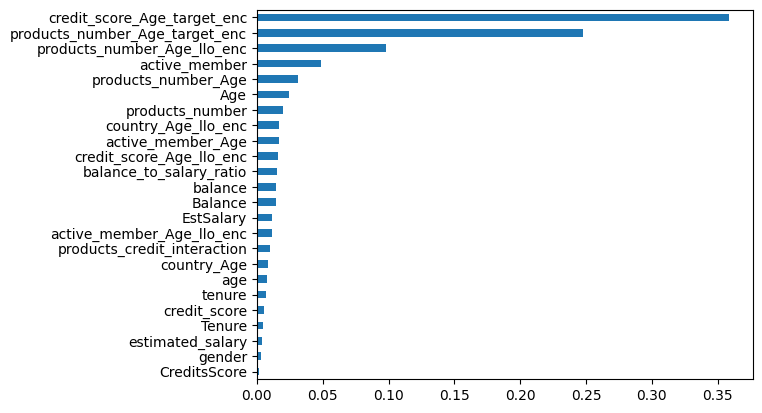

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');

In [ ]:
## B1243070 許志丞
#檢查資料相關特徵的重要性的數據,可以把重要性為0的droop調
feat_importances_df = feat_importances.reset_index()
feat_importances_df.columns = ['Feature', 'Importance']
print(feat_importances_df)


                           Feature  Importance
0                     CreditsScore    0.001928
1                           gender    0.003209
2                 estimated_salary    0.004207
3                           Tenure    0.005049
4                     credit_score    0.005443
5                           tenure    0.007136
6                              age    0.008036
7                      country_Age    0.008625
8      products_credit_interaction    0.009744
9        active_member_Age_llo_enc    0.011557
10                       EstSalary    0.011651
11                         Balance    0.014466
12                         balance    0.014788
13         balance_to_salary_ratio    0.015073
14        credit_score_Age_llo_enc    0.016080
15               active_member_Age    0.016930
16             country_Age_llo_enc    0.017131
17                 products_number    0.020112
18                             Age    0.024053
19             products_number_Age    0.031556
20           

In [ ]:
feat_importances_df = feat_importances.reset_index()
feat_importances_df.columns = ['Feature', 'Importance']
print(feat_importances_df)


                           Feature  Importance
0                     CreditsScore    0.001928
1                           gender    0.003209
2                 estimated_salary    0.004207
3                           Tenure    0.005049
4                     credit_score    0.005443
5                           tenure    0.007136
6                              age    0.008036
7                      country_Age    0.008625
8      products_credit_interaction    0.009744
9        active_member_Age_llo_enc    0.011557
10                       EstSalary    0.011651
11                         Balance    0.014466
12                         balance    0.014788
13         balance_to_salary_ratio    0.015073
14        credit_score_Age_llo_enc    0.016080
15               active_member_Age    0.016930
16             country_Age_llo_enc    0.017131
17                 products_number    0.020112
18                             Age    0.024053
19             products_number_Age    0.031556
20           

In [ ]:
# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print('test Accuracy:', accuracy)

# Calculate the recall
recall = recall_score(y_test, y_pred)
print('test Recall:', recall)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print('test F1 score:', f1)

test Accuracy: 0.9751580849141824
test Recall: 0.9788897576231431
test F1 score: 0.978507229386479


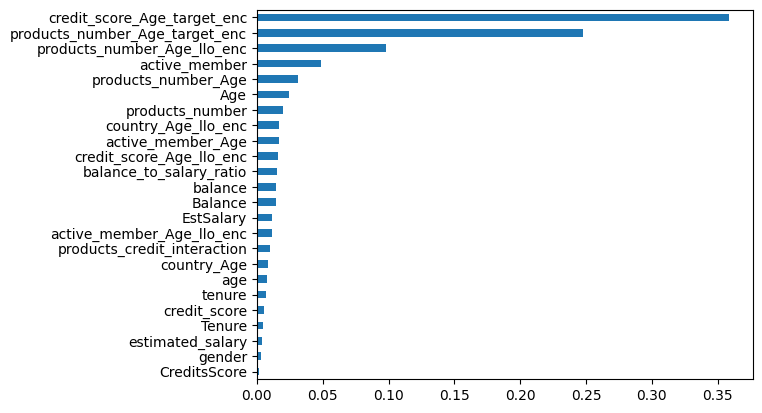

In [ ]:
feat_importances = pd.Series(XGB_model.feature_importances_, index = X_train.columns).sort_values(ascending = True)
feat_importances.plot(kind = 'barh');